<a href="https://colab.research.google.com/github/rocioromera911/Portafolio_RR/blob/main/PNL_breast-cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1 Parte Práctica: Aplicación de DNN en clasificación

Genere una red neuronal con Keras para pronosticar los valores binarios de un set de datos.

* Usar para entrenar y evaluar el dataset: Aprendizaje_breast-cancer-wisconsin.tab

* Usar para pronosticar: X_para_evaluar.csv

## Sobre los datos

El que dice: __Aprendizaje_breast-cancer-wisconsin.tab__ es el que tienen que usar para entrenar y elegir la mejor red neuronal que puedan.

Es un problema real, es un trabajo hecho en imágenes sobre tumores, estos son elementos medidos, así que debería andar muy bien.

Cuando lo abran hay una columna que se llama type, si es maligno o benigno, es un resultado binario y es la columna a pronosticar con el modelo.

Hay una columna que no sirve para nada que se llama selective

## Se pide:

1) Deberá crear un notebook para generar un modelo de producción con redes neuronales entrenado con los datos etiquetados y que permita hacer luego, el pronóstico para los datos indicados en el archivo __X_para_evaluar.csv__
* La métrica usada será Accuracy
* La arquitectura es libre.
    * Debe probar diferentes números de capas, neuronas y funciones de activación, si desea probar la variación de otros hiperparámetros, puede hacerlo.
* Utilice correctamente la división de datos para validación, evaluación y producción.
* Todas las divisiones de los datos son: 75% 25%
* Indique el Accuracy esperado para su modelo de producción.

__Nota:__ para que Keras les tome la variable Type la tienen que pasar como valores 0 y 1. Utilice 0 para maligno y 1 para benigno.

2) Deberán generar un archivo de tipo csv con una única columna, con nombre "ypred", con los valores pronosticados de type expresados en 0 o 1 de acuerdo a la convención indicada en la nota del punto anterior.

Cuando creen ese csv, pónganlo sin índice, o sea, debe tener una sola columna, si lo hacen desde pandas por ejemplo, usar la opción index=false, para que no agregue la columna índice.

* El archivo deberá tener por nombre, su nombre

        

In [ ]:
#Importo mi drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importo las librerias a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers

Tenemos 9 variables de entrada y la columna selected no sirve por lo que la descartamos

Vamos a crear modelos a ver como funcionan para quedarnos con el mejor. Comenzamos importando la base de datos.

In [ ]:
#Traigo el df para entrenar
df=pd.read_csv("/content/drive/MyDrive/ies 2023/data/Aprendizaje_breast-cancer-wisconsin.tab", sep="\t")

In [ ]:
df

,Clump thickness,Unif_Cell_Size,Unif_Cell_Shape,Marginal_Adhesion,Single_Cell_Size,Bare_Nuclei,Bland_Chromatine,Normal_Nucleoli,Mitoses,type,Selected
0,9.67,9.96,9.27,2.40,9.49,7.93,7.90,0.33,0.06,malign,No
1,0.14,0.15,0.47,0.82,1.71,0.19,2.22,0.55,0.49,benign,No
2,0.61,0.49,0.99,0.19,1.98,0.27,2.07,0.71,0.28,benign,No
3,7.29,1.11,3.42,0.07,4.63,0.25,4.17,3.76,3.11,malign,No
4,6.03,2.47,1.64,9.15,4.48,9.86,4.43,3.58,3.73,malign,No
...,...,...,...,...,...,...,...,...,...,...,...
578,5.00,4.92,4.65,5.29,2.63,9.22,2.81,0.78,0.13,malign,No
579,4.66,1.91,2.22,0.28,5.07,9.36,4.67,0.76,0.90,malign,No
580,2.90,0.77,0.24,3.74,2.32,0.23,1.19,1.12,0.94,benign,No
581,4.72,0.04,0.46,2.62,1.39,0.50,0.70,0.86,0.92,benign,No


In [ ]:
#le quito la columna que no sirve y cambio los resultados de y [type] a 0 si es maligno y 1 si es benigno
df=df.drop('Selected', axis=1)
df['type']= df['type'].map({'malign':0, 'benign':1})

In [ ]:
#Separo mi x e y para entrenarlos
Xtr=df.drop('type', axis=1)
Ytr=df['type']

Empiezo con la creacion de modelos. Comprobaremos 3 modelos con 2, con 3 y con 4 hidens. Y cada uno con 2 funciones de activacion "relu" y "selu".
Empezaremos con el de 2 hidens

In [ ]:
#Creamos una lista de las funciones de activacion que vamos a utilizar
activacion=["relu","selu"]

In [ ]:
def constructor2(a, b):
  for i in activacion:
    modelo2 = Sequential()
    modelo2.add(Input(shape=(9,),name="Entrada"))
    modelo2.add(Dense(units=a,activation=i,name='hide1',kernel_initializer=initializers.glorot_uniform(seed=123)))
    modelo2.add(Dense(units=b,activation=i,name='hide2',kernel_initializer=initializers.glorot_uniform(seed=123)))
    modelo2.add(Dense(units=1,activation='sigmoid',name='Salida',kernel_initializer=initializers.glorot_uniform(seed=123)))
    modelo2.compile(loss= 'binary_crossentropy' , optimizer= 'sgd' , metrics=[ 'accuracy' ])
    modelo2.fit(x=Xtr, y=Ytr, batch_size=64, epochs=100, validation_split=0.25)
    resultado2=pd.DataFrame(modelo2.history.history)
    resultado2.plot(figsize=(12,8),grid=True, title=i,ylim=(0,1))
    plt.show()

Epoch 1/100
7/7 [==============================] - 1s 41ms/step - loss: 0.7711 - accuracy: 0.3410 - val_loss: 0.7069 - val_accuracy: 0.3767
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.7324 - accuracy: 0.3432 - val_loss: 0.6779 - val_accuracy: 0.3836
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.7043 - accuracy: 0.3593 - val_loss: 0.6544 - val_accuracy: 0.3973
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6811 - accuracy: 0.3913 - val_loss: 0.6338 - val_accuracy: 0.4589
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6607 - accuracy: 0.4233 - val_loss: 0.6137 - val_accuracy: 0.4932
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6407 - accuracy: 0.4554 - val_loss: 0.5956 - val_accuracy: 0.5342
Epoch 7/100
7/7 [==============================] - 0s 21ms/step - loss: 0.6216 - accuracy: 0.4737 - val_loss: 0.5793 - val_accuracy: 0.5411
Epoch 8/100
7/7 [===

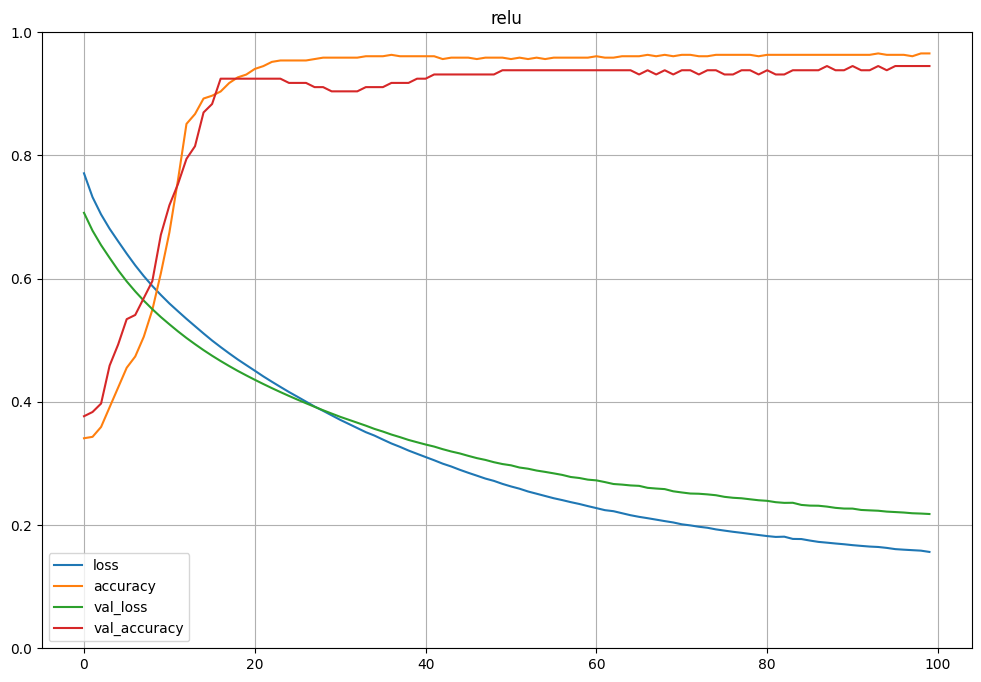

Epoch 1/100
7/7 [==============================] - 1s 49ms/step - loss: 0.5716 - accuracy: 0.7460 - val_loss: 0.4725 - val_accuracy: 0.8151
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.4232 - accuracy: 0.8902 - val_loss: 0.3744 - val_accuracy: 0.8836
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.3392 - accuracy: 0.9245 - val_loss: 0.3123 - val_accuracy: 0.9110
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.2837 - accuracy: 0.9314 - val_loss: 0.2702 - val_accuracy: 0.9452
Epoch 5/100
7/7 [==============================] - 0s 28ms/step - loss: 0.2468 - accuracy: 0.9428 - val_loss: 0.2408 - val_accuracy: 0.9658
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2199 - accuracy: 0.9451 - val_loss: 0.2196 - val_accuracy: 0.9658
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2000 - accuracy: 0.9474 - val_loss: 0.2037 - val_accuracy: 0.9658
Epoch 8/100
7/7 [=======

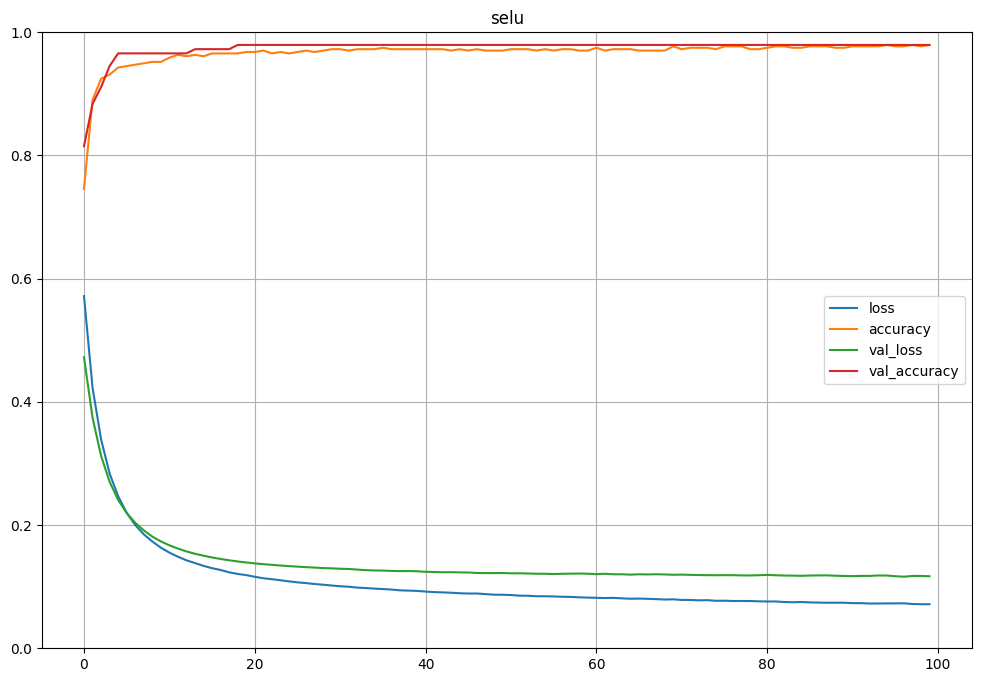

In [ ]:
constructor2(18, 9)

**Como podemos ver vemos que las 2 funcionaron muy bien pero nos quedamos con la funcion con las hiden1=18 y la segunda hiden2=9 con la funcion de activacion selu con un accuracy del 97,95%**

Ahora vamos a comprobar que tal andan con 3 hiden

In [ ]:
def constructor3(a, b, c):
  for i in activacion:
    modelo3 = Sequential()
    modelo3.add(Input(shape=(9,),name="Entrada"))
    modelo3.add(Dense(units=a,activation=i,name='hide1',kernel_initializer=initializers.glorot_uniform(seed=123)))
    modelo3.add(Dense(units=b,activation=i,name='hide2',kernel_initializer=initializers.glorot_uniform(seed=123)))
    modelo3.add(Dense(units=c,activation=i,name='hide3',kernel_initializer=initializers.glorot_uniform(seed=123)))
    modelo3.add(Dense(units=1,activation='sigmoid',name='Salida',kernel_initializer=initializers.glorot_uniform(seed=123)))
    modelo3.compile(loss= 'binary_crossentropy' , optimizer= 'sgd' , metrics=[ 'accuracy' ])
    modelo3.fit(x=Xtr, y=Ytr, batch_size=64, epochs=100, validation_split=0.25)
    resultado3=pd.DataFrame(modelo3.history.history)
    resultado3.plot(figsize=(12,8),grid=True, title=i,ylim=(0,1))
    plt.show()

Epoch 1/100
7/7 [==============================] - 1s 37ms/step - loss: 0.6753 - accuracy: 0.3570 - val_loss: 0.6270 - val_accuracy: 0.4041
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6567 - accuracy: 0.3684 - val_loss: 0.6120 - val_accuracy: 0.4384
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6417 - accuracy: 0.3753 - val_loss: 0.5993 - val_accuracy: 0.4589
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6285 - accuracy: 0.3982 - val_loss: 0.5878 - val_accuracy: 0.4863
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6163 - accuracy: 0.4348 - val_loss: 0.5772 - val_accuracy: 0.5274
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6050 - accuracy: 0.4760 - val_loss: 0.5674 - val_accuracy: 0.5685
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.5945 - accuracy: 0.5217 - val_loss: 0.5582 - val_accuracy: 0.6027
Epoch 8/100
7/7 [=======

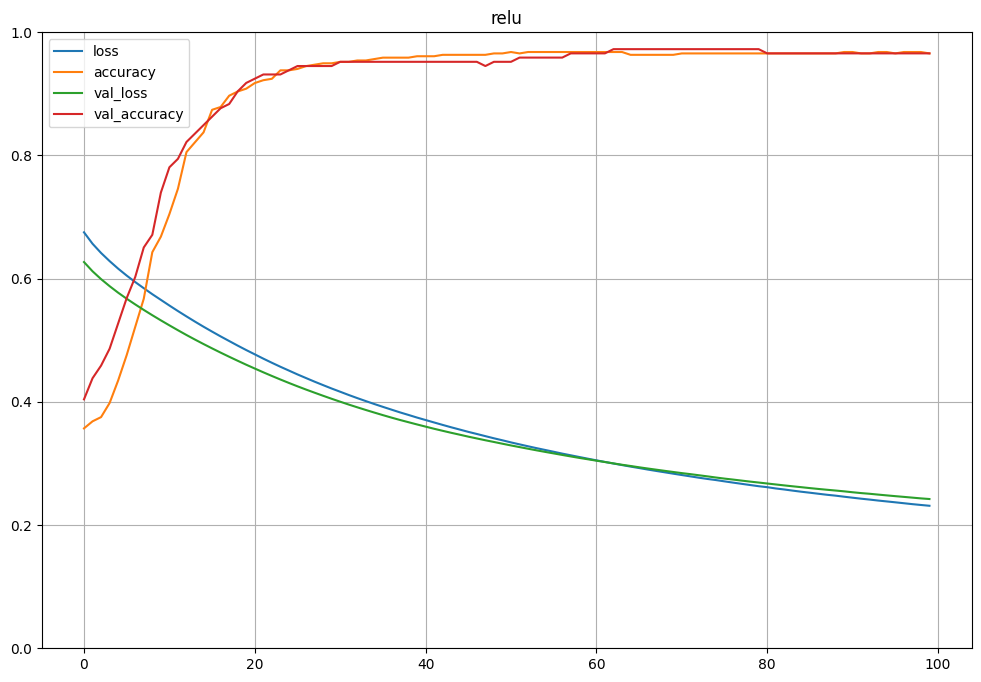

Epoch 1/100
7/7 [==============================] - 1s 37ms/step - loss: 0.8498 - accuracy: 0.5835 - val_loss: 0.5635 - val_accuracy: 0.8356
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.5425 - accuracy: 0.8032 - val_loss: 0.4389 - val_accuracy: 0.9110
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.4462 - accuracy: 0.8787 - val_loss: 0.3685 - val_accuracy: 0.9315
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.3863 - accuracy: 0.9108 - val_loss: 0.3204 - val_accuracy: 0.9521
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.3426 - accuracy: 0.9291 - val_loss: 0.2846 - val_accuracy: 0.9658
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.3074 - accuracy: 0.9359 - val_loss: 0.2568 - val_accuracy: 0.9795
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2785 - accuracy: 0.9451 - val_loss: 0.2350 - val_accuracy: 0.9795
Epoch 8/100
7/7 [=========

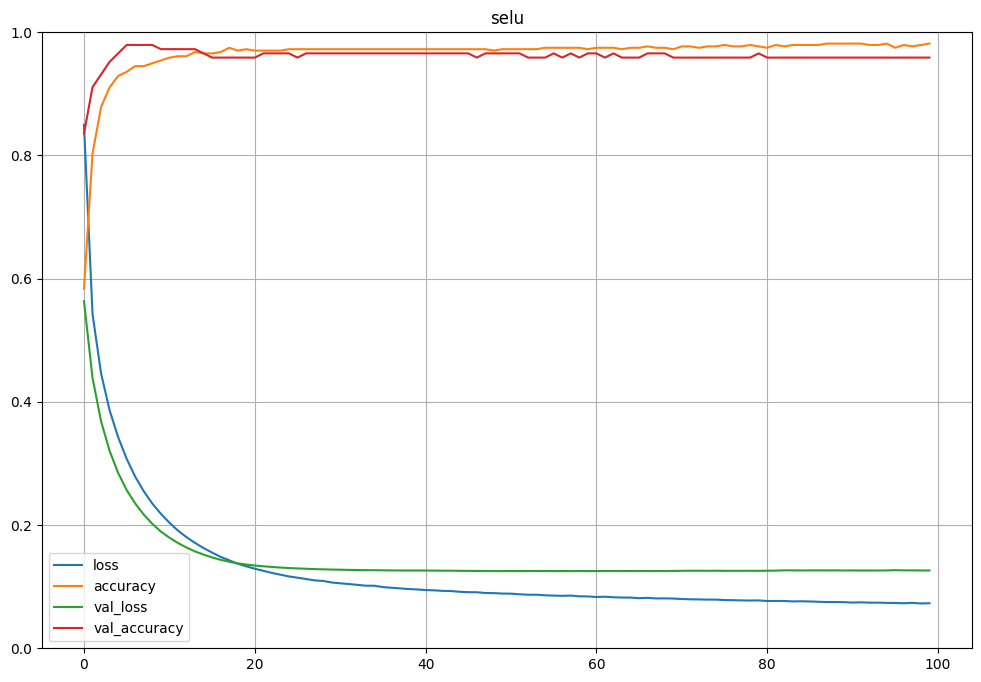

In [ ]:
constructor3(15,10,5)

**Como podemos ver vemos que las 2 funcionaron muy bien pero nos quedamos con la funcion con las hiden1=15, hiden2=10 y hiden3=5 con la funcion de activacion relu con un accuracy del 96,58%**

In [ ]:
def constructor4(a, b, c, d):
  for i in activacion:
    modelo4 = Sequential()
    modelo4.add(Input(shape=(9,),name="Entrada"))
    modelo4.add(Dense(units=a,activation=i,name='hide1',kernel_initializer=initializers.glorot_uniform(seed=123)))
    modelo4.add(Dense(units=b,activation=i,name='hide2',kernel_initializer=initializers.glorot_uniform(seed=123)))
    modelo4.add(Dense(units=c,activation=i,name='hide3',kernel_initializer=initializers.glorot_uniform(seed=123)))
    modelo4.add(Dense(units=d,activation=i,name='hide4',kernel_initializer=initializers.glorot_uniform(seed=123)))
    modelo4.add(Dense(units=1,activation='sigmoid',name='Salida',kernel_initializer=initializers.glorot_uniform(seed=123)))
    modelo4.compile(loss= 'binary_crossentropy' , optimizer= 'sgd' , metrics=[ 'accuracy' ])
    modelo4.fit(x=Xtr, y=Ytr, batch_size=64, epochs=100, validation_split=0.25)
    resultado4=pd.DataFrame(modelo4.history.history)
    resultado4.plot(figsize=(12,8),grid=True, title=i,ylim=(0,1))
    plt.show()

Epoch 1/100
7/7 [==============================] - 2s 68ms/step - loss: 0.6892 - accuracy: 0.6453 - val_loss: 0.6898 - val_accuracy: 0.6986
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6872 - accuracy: 0.7368 - val_loss: 0.6881 - val_accuracy: 0.6644
Epoch 3/100
7/7 [==============================] - 0s 36ms/step - loss: 0.6851 - accuracy: 0.7048 - val_loss: 0.6864 - val_accuracy: 0.6301
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6831 - accuracy: 0.6865 - val_loss: 0.6847 - val_accuracy: 0.6301
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6810 - accuracy: 0.6865 - val_loss: 0.6830 - val_accuracy: 0.6301
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6790 - accuracy: 0.6911 - val_loss: 0.6810 - val_accuracy: 0.6301
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6768 - accuracy: 0.6934 - val_loss: 0.6789 - val_accuracy: 0.6507
Epoch 8/100
7/7 [=====

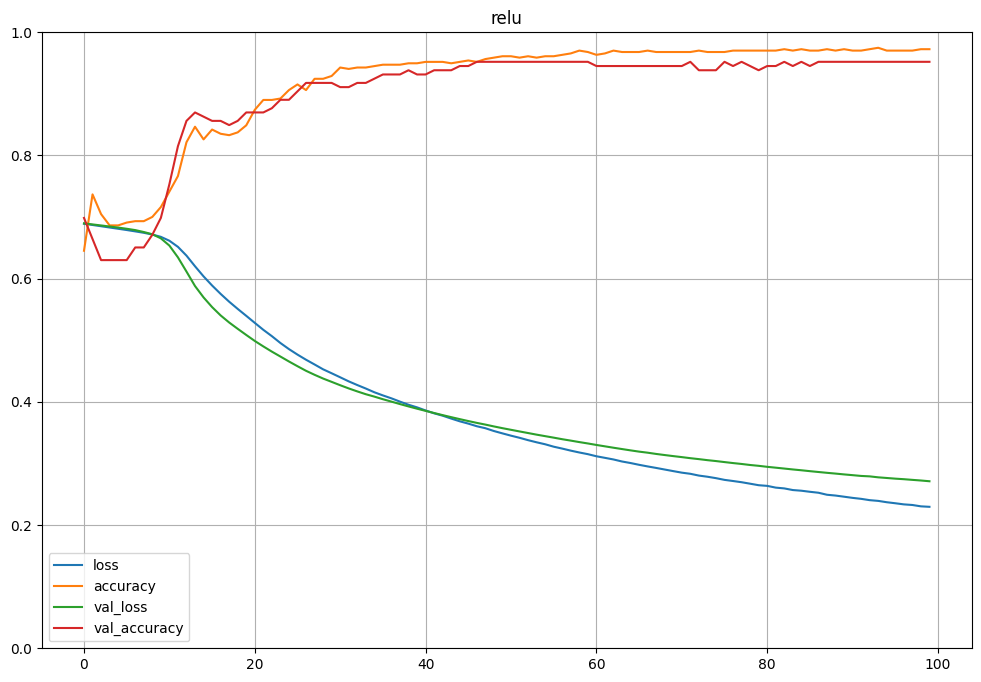

Epoch 1/100
7/7 [==============================] - 1s 56ms/step - loss: 0.8035 - accuracy: 0.6613 - val_loss: 0.5384 - val_accuracy: 0.7466
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 0.4170 - accuracy: 0.8741 - val_loss: 0.4059 - val_accuracy: 0.8630
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.3220 - accuracy: 0.9176 - val_loss: 0.3482 - val_accuracy: 0.8836
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.2768 - accuracy: 0.9314 - val_loss: 0.3131 - val_accuracy: 0.8904
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.2460 - accuracy: 0.9428 - val_loss: 0.2916 - val_accuracy: 0.8973
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.2244 - accuracy: 0.9474 - val_loss: 0.2683 - val_accuracy: 0.9110
Epoch 7/100
7/7 [==============================] - 0s 13ms/step - loss: 0.2079 - accuracy: 0.9497 - val_loss: 0.2551 - val_accuracy: 0.9041
Epoch 8/100
7/7 [===

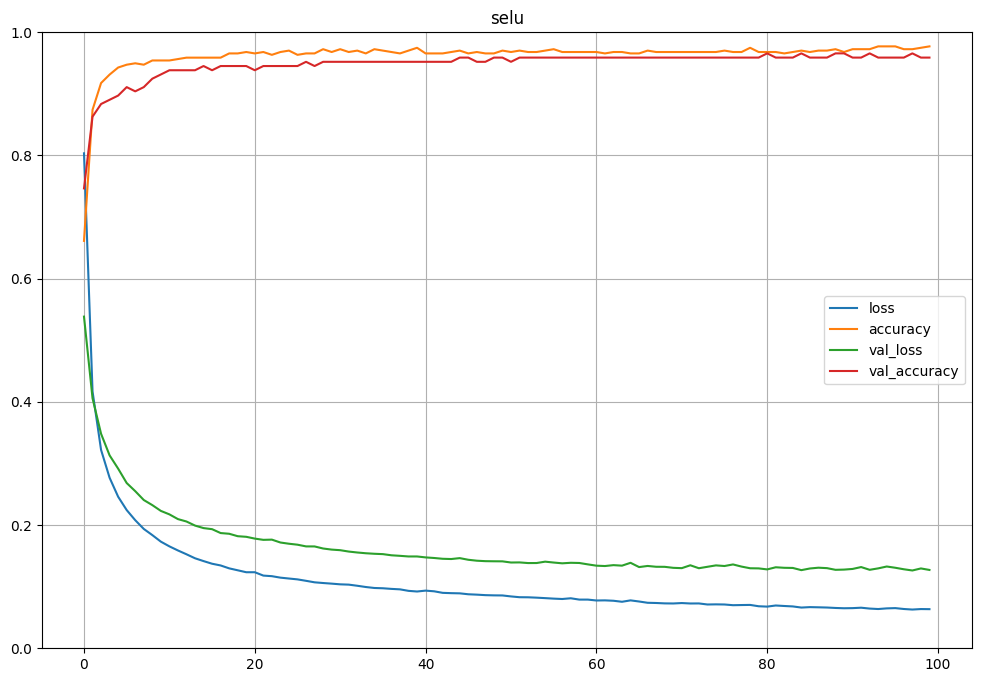

In [ ]:
constructor4(20,15,10,5)

**Como podemos ver vemos que las 2 funcionaron muy bien pero nos quedamos con la funcion con las hiden1=20, hiden2=15, hiden3=10 y hiden4=5 con la funcion de activacion relu con un accuracy del 95,89%**

## **Ya sabemos cual es nuestro mejor modelo y es el 2 hidens**
Como podemos ver vemos que las 2 funcionaron muy bien pero nos quedamos con la funcion con las hiden1=18 y hiden2=9 con la funcion de activacion selu con un accuracy del 97,95%

# Entrenamos el mejor modelo

Epoch 1/100
7/7 [==============================] - 1s 38ms/step - loss: 0.5722 - accuracy: 0.7437 - val_loss: 0.4742 - val_accuracy: 0.8082
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.4249 - accuracy: 0.8879 - val_loss: 0.3747 - val_accuracy: 0.8836
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.3390 - accuracy: 0.9245 - val_loss: 0.3135 - val_accuracy: 0.9247
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.2856 - accuracy: 0.9314 - val_loss: 0.2715 - val_accuracy: 0.9658
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.2478 - accuracy: 0.9405 - val_loss: 0.2417 - val_accuracy: 0.9658
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.2201 - accuracy: 0.9474 - val_loss: 0.2199 - val_accuracy: 0.9658
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.2008 - accuracy: 0.9474 - val_loss: 0.2037 - val_accuracy: 0.9658
Epoch 8/100
7/7 [=======

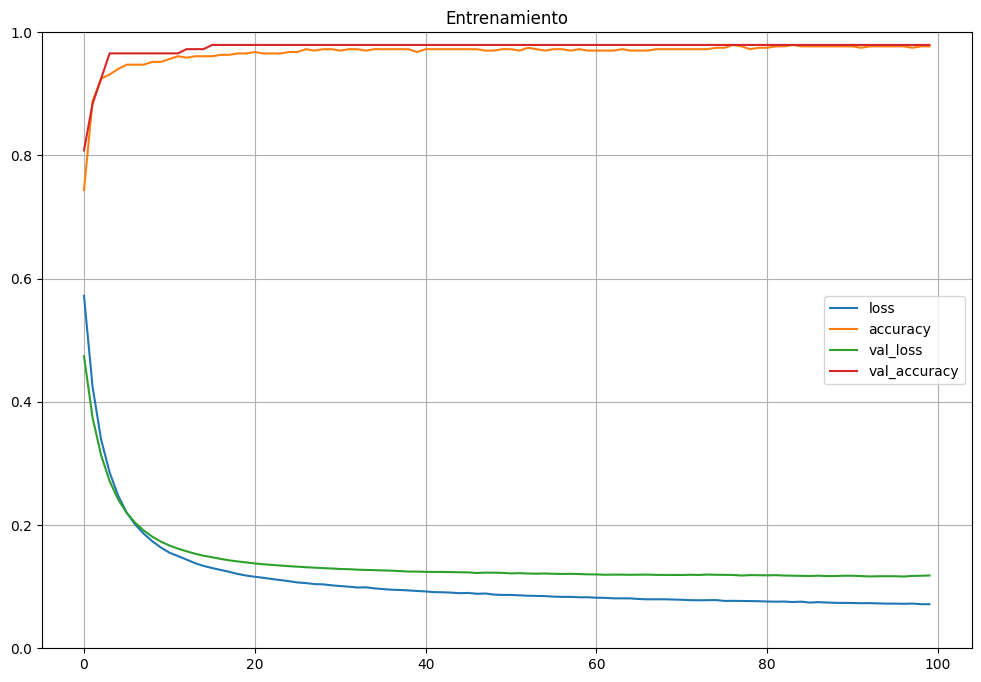

In [ ]:
#Entrenamos al modelo
modelotr = Sequential()
modelotr.add(Input(shape=(9,),name="Entrada"))
modelotr.add(Dense(units=18,activation="selu",name='hide1',kernel_initializer=initializers.glorot_uniform(seed=123)))
modelotr.add(Dense(units=9,activation="selu",name='hide2',kernel_initializer=initializers.glorot_uniform(seed=123)))
modelotr.add(Dense(units=1,activation='sigmoid',name='Salida',kernel_initializer=initializers.glorot_uniform(seed=123)))
modelotr.compile(loss= 'binary_crossentropy' , optimizer= 'sgd' , metrics=[ 'accuracy' ])
modelotr.fit(x=Xtr, y=Ytr, batch_size=64, epochs=100, validation_split=0.25)
resultadotr=pd.DataFrame(modelotr.history.history)
resultadotr.plot(figsize=(12,8),grid=True, title="Entrenamiento",ylim=(0,1))
plt.show()

Por lo visto nuestro modelo se adapta muy bien a los datos dando un 97,95%. Por lo que ahora vamos a crear un nuevo modelo el cual le vamos a pasar todo el DataFrame para que tenga mejores resultados y vamos a realizar la prediccion sobre los valores nunca vistos. Por lo que vamos a replicar los pasos de cracion del modelo anterior.

In [ ]:
modelofin = Sequential()
modelofin.add(Input(shape=(9,),name="Entrada"))
modelofin.add(Dense(units=18,activation='selu',name='hide1',kernel_initializer=initializers.glorot_uniform(seed=123)))
modelofin.add(Dense(units=9,activation='selu',name='hide2',kernel_initializer=initializers.glorot_uniform(seed=123)))
modelofin.add(Dense(units=1,activation='sigmoid',name='Salida',kernel_initializer=initializers.glorot_uniform(seed=123)))

In [ ]:
modelofin.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hide1 (Dense)               (None, 18)                180       
                                                                 
 hide2 (Dense)               (None, 9)                 171       
                                                                 
 Salida (Dense)              (None, 1)                 10        
                                                                 
Total params: 361 (1.41 KB)
Trainable params: 361 (1.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelofin.compile(loss= 'binary_crossentropy' , optimizer= 'sgd' , metrics=[ 'accuracy' ])

In [ ]:
modelofin.fit(x=Xtr, y=Ytr, batch_size=64, epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.5431 - accuracy: 0.7787
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.9108
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2890 - accuracy: 0.9331
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2359 - accuracy: 0.9520
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2051 - accuracy: 0.9554
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1846 - accuracy: 0.9588
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1699 - accuracy: 0.9588
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9588
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1496 - accuracy: 0.9640
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1430 - accuracy: 0.9640
Epoch 11/

In [ ]:
#Ahora llamamos el df que tenemos que evaluar
Evaluar=pd.read_csv("/content/drive/MyDrive/aprendizaje automatico 3/tp/X_para_evaluar.csv")

In [ ]:
#Obtenemos los resultados
prediccion=modelofin.predict(Evaluar)
prediccion

4/4 [==============================] - 0s 3ms/step


array([[1.2358416e-04],
       [9.9195236e-01],
       [9.8730260e-01],
       [9.9183530e-01],
       [9.9509346e-01],
       [1.3708942e-01],
       [9.5131196e-05],
       [9.9176759e-01],
       [9.9470675e-01],
       [9.7410235e-04],
       [9.9404973e-01],
       [9.9303055e-01],
       [5.3266496e-03],
       [5.9483531e-03],
       [9.8861927e-01],
       [9.9661338e-01],
       [9.5721251e-01],
       [5.1370932e-04],
       [4.4837467e-02],
       [9.9143988e-01],
       [3.3212837e-04],
       [9.8249424e-01],
       [9.6024543e-01],
       [9.8882532e-01],
       [9.5429677e-01],
       [9.9328035e-01],
       [9.9281526e-01],
       [9.7900099e-01],
       [9.9322581e-01],
       [5.9037036e-05],
       [9.9064529e-01],
       [9.8705548e-01],
       [9.7716039e-01],
       [5.9022008e-05],
       [9.8753357e-03],
       [9.9190217e-01],
       [9.8703206e-01],
       [9.7970188e-01],
       [3.1554744e-01],
       [9.9330032e-01],
       [9.9021143e-01],
       [8.125250

In [ ]:
#Pero como no nos sirven esos resultados y lo queremos solo en 0 o 1 lo que debemos hacer es convertirlos arbitrariamente:
pred=(prediccion>=0.5).astype(int)
pred

array([[0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
    

In [ ]:
#Una vez convertido en el formato que queremos lo transformamos en un df para despues descargarlo
dfin=pd.DataFrame()
dfin["ypred"]=pd.DataFrame(pred)

In [ ]:
#Corroboramos que se haya creado bien
dfin

,ypred
0,0
1,1
2,1
3,1
4,1
...,...
95,1
96,1
97,0
98,0


In [ ]:
dfin.to_csv('Juan_Monserrat.csv',index=False)

In [ ]:
#Corroboramos que se haya descargado bien
prueba=pd.read_csv("/content/Juan_Monserrat.csv")
prueba

,ypred
0,0
1,1
2,1
3,1
4,1
...,...
95,1
96,1
97,0
98,0
